In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DPI = 300
FONT_SCALE = 0.5
sns.set_palette('muted')
sns.set(font_scale=FONT_SCALE)

In [10]:
df = pd.read_csv('results/results_csd3.csv', index_col=0)
df.head()

,write_time_total,write_time_avg,write_throughput,read_time_total,read_time_avg,read_throughput,n_workers,n_samples,file_size
0,60.217738,0.595759,1700.495634,117.681823,1.169681,870.142878,1,100,1024
1,22.739719,0.441489,4503.133939,43.105960,0.844546,2375.541552,2,100,1024
2,12.469081,0.466486,8212.313214,21.775163,0.840549,4702.605455,4,100,1024
3,8.233351,0.439756,12437.219568,15.042876,0.839130,6807.208830,6,100,1024
4,6.765270,0.448844,15136.128561,11.943415,0.841881,8573.762247,8,100,1024


Plot write test metrics

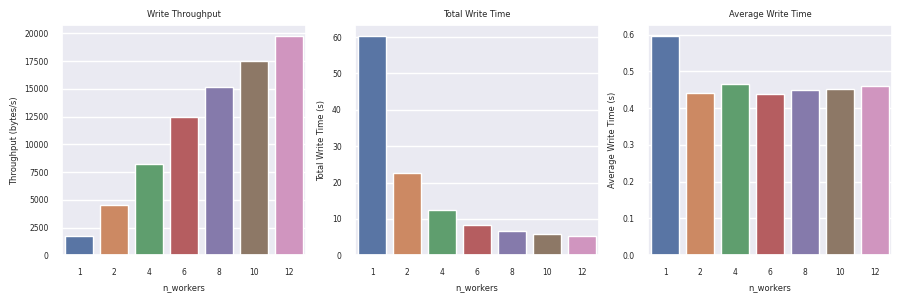

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df, y='write_throughput', x='n_workers', ax=ax1)
sns.barplot(df, y='write_time_total', x='n_workers', ax=ax2)
sns.barplot(df, y='write_time_avg', x='n_workers', ax=ax3)
ax1.set_title('Write Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Write Time')
ax2.set_ylabel('Total Write Time (s)')
ax3.set_title('Average Write Time')
ax3.set_ylabel('Average Write Time (s)')
plt.tight_layout()

Plot read test metrics

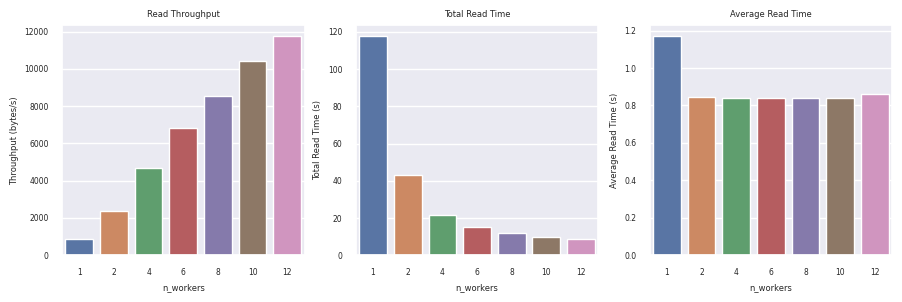

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df, y='read_throughput', x='n_workers', ax=ax1)
sns.barplot(df, y='read_time_total', x='n_workers', ax=ax2)
sns.barplot(df, y='read_time_avg', x='n_workers', ax=ax3)
ax1.set_title('Read Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Read Time')
ax2.set_ylabel('Total Read Time (s)')
ax3.set_title('Average Read Time')
ax3.set_ylabel('Average Read Time (s)')
plt.tight_layout()

Compare between different endpoints

In [13]:
df_stfc = pd.read_csv('results/results_stfc.csv', index_col=0)
df_stfc['endpoint'] = 'stfc'
df_csd3 = pd.read_csv('results/results_csd3.csv', index_col=0)
df_csd3['endpoint'] = 'csd3'
df_csd3_local = pd.read_csv('results/results_csd3_local.csv', index_col=0)
df_csd3_local['endpoint'] = 'csd3_local'
df_aws = pd.read_csv('results/results_aws.csv', index_col=0)
df_aws['endpoint'] = 'aws'
df = pd.concat([df_csd3, df_csd3_local, df_stfc, df_aws])
df.head()

,write_time_total,write_time_avg,write_throughput,read_time_total,read_time_avg,read_throughput,n_workers,n_samples,file_size,endpoint
0,60.217738,0.595759,1700.495634,117.681823,1.169681,870.142878,1,100,1024,csd3
1,22.739719,0.441489,4503.133939,43.105960,0.844546,2375.541552,2,100,1024,csd3
2,12.469081,0.466486,8212.313214,21.775163,0.840549,4702.605455,4,100,1024,csd3
3,8.233351,0.439756,12437.219568,15.042876,0.839130,6807.208830,6,100,1024,csd3
4,6.765270,0.448844,15136.128561,11.943415,0.841881,8573.762247,8,100,1024,csd3


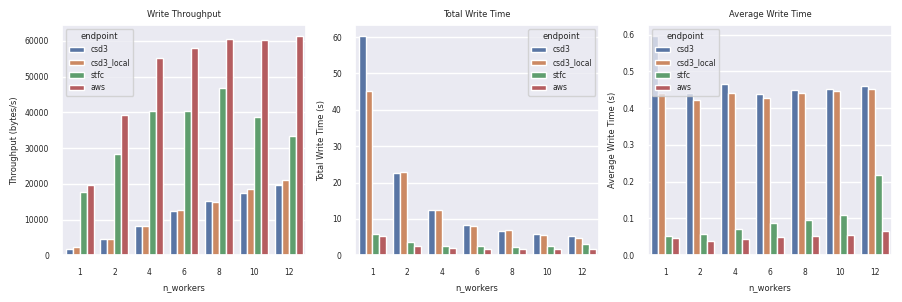

In [14]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df, y='write_throughput', x='n_workers', hue='endpoint', ax=ax1)
sns.barplot(df, y='write_time_total', x='n_workers', hue='endpoint', ax=ax2)
sns.barplot(df, y='write_time_avg', x='n_workers', hue='endpoint', ax=ax3)
ax1.set_title('Write Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Write Time')
ax2.set_ylabel('Total Write Time (s)')
ax3.set_title('Average Write Time')
ax3.set_ylabel('Average Write Time (s)')
plt.tight_layout()
plt.savefig('plots/write_comparison.png', dpi=DPI)

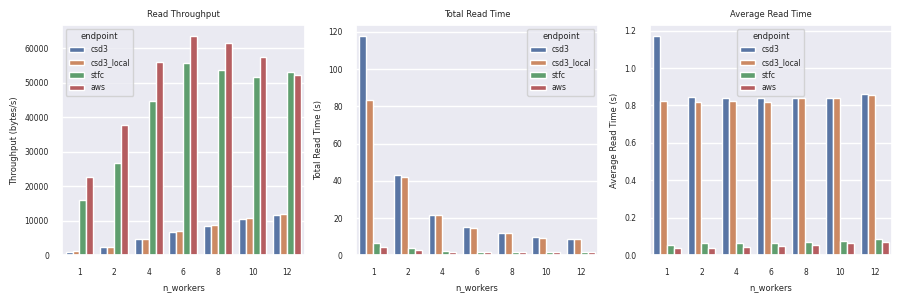

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df, y='read_throughput', x='n_workers', hue='endpoint', ax=ax1)
sns.barplot(df, y='read_time_total', x='n_workers', hue='endpoint', ax=ax2)
sns.barplot(df, y='read_time_avg', x='n_workers', hue='endpoint', ax=ax3)
ax1.set_title('Read Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Read Time')
ax2.set_ylabel('Total Read Time (s)')
ax3.set_title('Average Read Time')
ax3.set_ylabel('Average Read Time (s)')
plt.tight_layout()
plt.savefig('plots/read_comparison.png', dpi=DPI)